In [82]:
import zipfile
from zipfile import ZipFile
from PIL import Image
import pytesseract
import cv2 as cv
import numpy as np
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
# loading the face detection classifier
face_cascade = cv.CascadeClassifier(r'C:\Users\DELL\Downloads\haarcascade_frontalface_default.xml')

images={}
# the rest is up to you!
archive=zipfile.ZipFile(r'E:\niranjan\project\py3\readonly\images.zip','r')
for _ in archive.infolist():
    file=archive.open(_)
    img=Image.open(file).convert('RGB')
    images[_.filename] = {'pil_img':img}
    
for img_name in images.keys():
    text = pytesseract.image_to_string(images[img_name]['pil_img'])
    images[img_name]['text'] = text


In [61]:

for img_name in images.keys():
    cv_img=np.array(images[img_name]['pil_img'])
    cv_img = cv.cvtColor(cv_img, cv.COLOR_BGR2GRAY)
    boxes=face_cascade.detectMultiScale(cv_img,1.3,5)
    images[img_name]['faces'] = []
    for x,y,w,h in boxes:
        face = images[img_name]['pil_img'].crop((x,y,x+w,y+h))
        face=face.resize((100,100))
        images[img_name]['faces'].append(face)
        
        

In [63]:
import math
for img_name in images.keys():
    images[img_name]['contact sheet']=[]
    h = math.ceil(len(images[img_name]['faces'])/5)
    contact_sheet=Image.new('RGB',(500, 100*h))
    x=0
    y=0
    for _ in images[img_name]['faces']:
        contact_sheet.paste(_,(x,y))
        if x+100==500:
            x=0
            y=y+100
        else:
            x=x+100
    images[img_name]['contact sheet'].append(contact_sheet)

In [78]:
def search(word):
    for img_name in images:
        if word in images[img_name]['text']:
            print('Results found in file {}'.format(img_name))
            if(images[img_name]['contact sheet'][0]):
                display(images[img_name]['contact sheet'][0])
            else:
                print('But there were no faces in that file')
            
            

Results found in file a-0.png


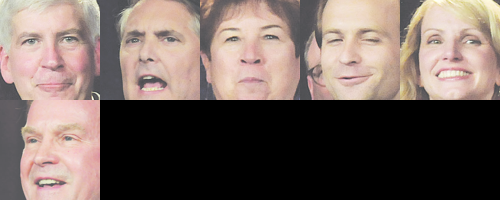

Results found in file a-3.png


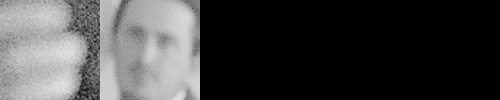

In [79]:
search('Christopher')

Results found in file a-0.png


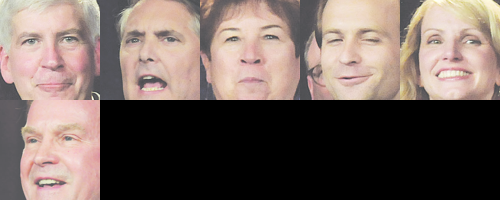

Results found in file a-1.png


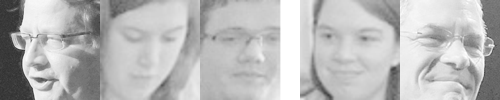

Results found in file a-2.png


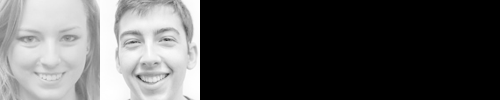

Results found in file a-3.png


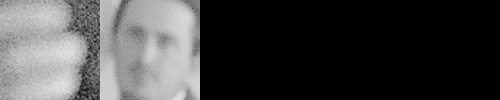

In [80]:
search('Mark')

Results found in file a-2.png


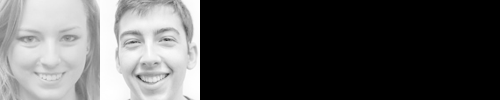

In [81]:
search('pizza')